# Projekt: **Tolka handskriven text**
---
### ***Problembeskrivning***
Målet med detta projekt är att utveckla en maskininlärningsmodell som kan tolka och klassificera handskriven text.
</br>Specifikt vill jag skapa en modell som kan identifiera handskrivna siffror från 0 till 9. 
</br>Detta har många praktiska tillämpningar, från att automatisera postsortering till att digitalisera handskrivna dokument.

### ***Data och Datakälla***
För detta projekt har jag valt att använda MNIST-datasetet.
</br>MNIST-datasetet finns tillgängligt via flera källor, men jag kommer att använda det via scikit-learn biblioteket.
</br>Detta dataset är standard för att träna och testa modeller inom maskininlärning för handskriftsigenkänning.

### ***Lär känna ditt data***
För att lära känna datan, utförde jag följande analys:
1. *Är det komplett?*

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# Lada data
# Obs: (as_frame=False) används då returneras data som NumPy-arrayer istället för Pandas DataFrames
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


In [2]:
# Är det komplett?
print(f"Datasetets form: antal bilder {X.shape[0]}, pixlar per bild {X.shape[1]}")

Datasetets form: antal bilder 70000, pixlar per bild 784


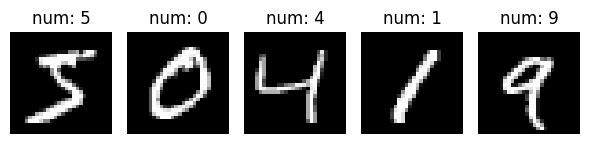

In [3]:
import matplotlib.pyplot as plt

# Några exempel på bilder
fig, axes = plt.subplots(1, 5, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"num: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

2. *Det finns inga null-värden i datasetet*

In [4]:
# Har du null-värden?
is_null = np.isnan(X).any()
print("Du har inga null-värde" if not is_null else "En eller fler rader har null-värde")


Du har inga null-värde


3. *Har du extrema värden?*

In [5]:
# Kontrollera extremvärden
print("Min pixel-värde:", X.min())
print("Max pixel-värde:", X.max())

# kontrollera om bilderna är i RGB-format
print(f"Bilderna är i RGB-format" if len(X.shape) == 3 and X.shape[-1] == 3 else "Bilderna är i gråskala")


Min pixel-värde: 0
Max pixel-värde: 255
Bilderna är i gråskala


4. *Vilka datatyper har datat?*

In [6]:
print(f"X (bilddata) datatyp: {X.dtype}")
print(f"y (etiketter) datatyp: {y.dtype}")

X (bilddata) datatyp: int64
y (etiketter) datatyp: object


5. *Vilka fält i ditt data vill du använda dig av?*

In [7]:
print(f"X: {X.shape[1]} pixelvärden per bild")
print(f"y: Etiketterna {np.unique(y)}")

X: 784 pixelvärden per bild
y: Etiketterna ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


6. *Hur kan du konvertera alla fält du vill använda till ett numeriskt format?*
 
    - Pixelvärdena är redan i numeriskt format, men vi behöver normalisera dem så att varje pixel har 
        </br>ett värde mellan 0 och 1 genom att dividera med 255, vilket förbättrar noggrannheten under träningen.
    - Etiketterna behöver konverteras från strängar till heltal.


In [8]:
# Vi delar med 255 eftersom det högsta värdet i ett gråskalebild är 255
# Detta hjälper till att standardisera värdena, vilket förbättrar träningsprocessen
X_normalized = X / 255.0
print(f"X: Normaliserat till intervallet [0, 1]. Exp: {X_normalized[0][:5]}")

X: Normaliserat till intervallet [0, 1]. Exp: [0. 0. 0. 0. 0.]


In [11]:
y_num = y.astype(int)
print(f"Konvertera y till heltal. Exp: {y_num[:5]}")

Konvertera y till heltal. Exp: [5 0 4 1 9]


### ***Dataegenskaper***
Efter små steg som beskrivs ovan har jag dataegenskaper:
- Antal bilder: 70000 
- Bildstorlek:  28x28 pixlar, 784 pixlar per bild
- Gråskalevärden: 0-255
- 10 klasser (siffror 0-9)

### ***Typ av problem***
Detta är ett klassificeringsproblem och vårt data är labeled, vilket betyder att vi har färdiga svar att mata vår modell med under träning. Detta gör det till ett övervakat (supervised) inlärningsproblem.

### ***Lösning insats***
För att lösa detta problem kommer jag att använda en Convolutional Neural Network (CNN), som är särskilt effektiv för bildklassificeringsuppgifter
</br>eftersom den utnyttjar rumsliga hierarkier i bilder, vilket gör att den kan lära sig komplexa mönster och strukturer i bilddata och 
</br>TensorFlow och Keras för att implementera och träna vår modell. 
</br>Dessa bibliotek erbjuder en hög nivå av flexibilitet och effektivitet för djupinlärning.

 (genom konvolutionella filter).

### ***Framtida steg***
- Implementera och träna CNN-modell
- Utvärdera modellen
- Finjustera modellen för bättre resultat
- Testa modellen på nya, osedda handskrivna siffror